In [11]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 216 kB 28.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640423 sha256=ca8b0e01e13029504caf4577f4605c136d827384be2001639cba859e2746009e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [12]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("Crash_Data.csv")

In [15]:
data

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX
0,-76.327929,37.017204,1,141955102,2014,2014/07/14 17:00:00+00,825,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,8. Non-Intersection,1. Straight - Level,1. Concrete,1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,5. Hampton Roads,114.0,114. City of Hampton,A. Urban Interstate,"3. Divided, full control of access",Urban,INTERSTATE,5.0,VDOT_IS,Not Intersection,Hampton Roads,Hampton Roads Transportation Planning Organiza...,R-VA IS00064EB,267.95,NaN,NaN,No,NaN
1,-81.855876,36.747240,2,140525231,2014,2014/02/21 17:00:00+00,1545,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",4. Four Approaches,4. Stop Sign,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,1. Bristol,95.0,095. Washington County,4. Rural Major Collector,"0. Two-way, non-divided",Rural,PRIMARY,4.0,VDOT_PRI,VDOT Intersection,Mount Rogers,NaN,R-VA SR00080NB,0.00,651596.0,0.0,No,NaN
2,-77.220990,38.762770,3,141740135,2014,2014/03/31 17:00:00+00,1746,C. Nonvisible Injury,0,0,0,1,1,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",2. Two Approaches,6. Traffic Lanes Marked,6. No Traffic Control Device Present,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,Yes,No,No,No,No,No,No,No,No,3. No,No,No,No,No,9. Northern Virginia,29.0,029. Fairfax County,H. Urban Minor Arterial,"4. One-way, part of a one-way system",Urban,SECONDARY,7.0,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC06945NB RMP001.00A,0.03,757276.0,0.0,No,NaN
3,-77.541468,37.552387,4,141415244,2014,2014/05/21 17:00:00+00,1717,B. Visible Injury,0,0,1,0,1,0,0,1,16. Other,5. Rain,2. Daylight,NOT_RD,2. Wet,9. Within Intersection,3. Grade - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",4. Four Approaches,1. No Traffic Control,6. No Traffic Control Device Present,2. No,NaN,NaN,39. Fell/Jumped From Vehicle,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,4. Richmond,127.0,127. City of Richmond,I. Urban Collector,"0. Two-way, non-divided",Urban,OTHER,1.0,URBAN_SEC,Urban Intersection,Richmond Regional,Richmond Transportation Planning Organization,R-VA127UR07512WB,3.21,210242.0,1146.0,No,NaN
4,-77.306306,38.847087,5,141715186,2014,2014/06/19 17:00:00+00,806,B. Visible Injury,0,0,1,0,1,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_

In [16]:
data = data.sample(n = 50000)

In [17]:
data['PLAN_DISTRICT'].value_counts()

Northern Virginia                          12094
Hampton Roads                               9878
Richmond Regional                           5653
George Washington Regional                  2551
Richmond Regional, Crater                   2189
Central Shenandoah                          1895
Roanoke Valley-Alleghany                    1843
Region 2000                                 1515
Thomas Jefferson                            1499
Northern Shenandoah Valley                  1484
Mount Rogers                                1387
Rappahannock - Rapidan                      1205
Crater                                      1142
New River Valley                            1071
West Piedmont                               1066
Cumberland Plateau                           597
Southside                                    557
Commonwealth Regional                        527
Lenowisco                                    512
Roanoke Valley-Alleghany, West Piedmont      366
Middle Peninsula    

In [18]:
sum_column = data["PERSONS_INJURED"] + data['PEDESTRIANS_KILLED'] + data['PEDESTRIANS_INJURED']
data["ALL_INJURIES"] = sum_column
data.head()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX,ALL_INJURIES
133093,-79.463346,38.318200,133094,151145198,2015,2015/04/22 17:00:00+00,2220,B. Visible Injury,0,0,1,0,1,0,0,1,9. Fixed Object - Off Road,1. No Adverse Condition (Clear/Cloudy),5. Darkness - Road Not Lighted,RD_RIGHT,1. Dry,8. Non-Intersection,4. Grade - Curve,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,14. Ditch,2. Shoulder,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,Yes,No,Yes,Yes,8. Staunton,45.0,045. Highland County,3. Rural Minor Arterial,"0. Two-way, non-divided",Rural,PRIMARY,6.0,VDOT_PRI,Not Intersection,Central Shenandoah,NaN,R-VA US00250EB,25.76,720314.0,10196.0,No,NaN,1
75872,-77.381684,37.541363,75873,142635160,2014,2014/09/20 17:00:00+00,739,B. Visible Injury,0,0,1,1,2,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,Yes,No,No,No,3. No,No,No,Yes,No,4. Richmond,43.0,043. Henrico County,H. Urban Minor Arterial,"0. Two-way, non-divided",Urban,PRIMARY,1.0,VDOT_PRI,VDOT Intersection,Richmond Regional,Richmond Transportation Planning Organization,R-VA SR00033WB,4.27,378246.0,16.0,No,NaN,2
232905,-79.964859,37.220116,232906,151695176,2015,2015/05/21 17:00:00+00,822,PDO. Property Damage Only,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,8. Non-Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,2. Salem,128.0,128. City of Roanoke,NaN,NaN,Urban,OTHER,6.0,URBAN_SEC,Not Intersection,Roanoke Valley-Alleghany,Roanoke Valley Transportation Planning Organiz...,R-VA128UR00025NB,0.97,NaN,NaN,No,NaN,0
10769,-78.494138,38.059066,10770,142685279,2014,2014/09/25 17:00:00+00,1734,PDO. Property Damage Only,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,10. Intersection Related - Within 150 Feet,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"4. One-Way, Not Divided",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,Yes,Yes,No,7. Culpeper,104.0,104. City of Charlottesville,E. Urban Other Principal Arterials; Connecting...,"1. Divided, no control of access",Urban,OTHER,3.0,URBAN_PRI,Urban Intersection,Thomas Jefferson,Charlottesville-Albemarle Metropolitan Plannin...,R-VA US00029SB,139.45,111326.0,153.0,No,NaN,0
166685,-79.382245,36.557683,166686,151125153,2015,2015/04/21 17:00:00+00,1308,B. Visible Injury,0,0,1,0,1,0,0,1,16. Other,1. No Adverse Condition (Clear/Cloud

In [19]:
df1 = data[data['PLAN_DISTRICT'] == 'Northern Virginia']
df1.head()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,ANIMAL,SPEED_DIFF_MAX,ALL_INJURIES
46546,-77.157790,38.894495,46547,142695188,2014,2014/09/26 17:00:00+00,845,B. Visible Injury,0,0,1,0,1,0,1,1,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,19. Ped,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,Yes,No,2. Yes - With School Activity,No,Yes,No,No,9. Northern Virginia,0.0,000. Arlington County,NaN,NaN,Urban,OTHER,7.0,URBAN_OTHER,Urban Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,S-VA000PR 26TH ST N,3.70,NaN,NaN,No,NaN,2
291756,-77.335135,38.858874,291757,162940037,2016,2016/10/03 17:00:00+00,810,PDO. Property Damage Only,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,6. No Traffic Control Device Present,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,9. Northern Virginia,29.0,029. Fairfax County,H. Urban Minor Arterial,"0. Two-way, non-divided",Urban,SECONDARY,7.0,VDOT_SEC,Not Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC00665WB,8.81,264185.0,306.0,No,NaN,0
131206,-77.116525,38.834442,131207,150225121,2015,2015/01/22 17:00:00+00,818,PDO. Property Damage Only,0,0,0,0,0,0,0,2,1. Rear End,5. Rain,2. Daylight,NOT_RD,2. Wet,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,20. Motor Vehicle In Transport,1. On Roadway,No,Belted,No,Yes,No,No,No,No,No,No,No,No,3. No,No,No,Yes,No,9. Northern Virginia,100.0,100. City of Alexandria,H. Urban Minor Arterial,"1. Divided, no control of access",Urban,OTHER,7.0,URBAN_SEC,Urban Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA100UR06622NB,1.69,101868.0,211.0,No,NaN,0
160309,-77.227014,38.931951,160310,150330049,2015,2015/01/09 17:00:00+00,1305,A. Severe Injury,0,1,0,0,1,0,1,1,12. Ped,1. No Adverse Condition (Clear/Cloudy),2. Daylight,NOT_RD,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,19. Ped,1. On Roadway,No,Belted,No,No,No,No,No,No,No,No,Yes,No,3. No,Yes,No,Yes,No,9. Northern Virginia,29.0,029. Fairfax County,I. Urban Collector,"0. Two-way, non-divided",Urban,SECONDARY,7.0,VDOT_SEC,VDOT Intersection,Northern Virginia,Northern Virginia Portion of The Metropolitan ...,R-VA029SC05062WB,0.31,272221.0,16.0,No,NaN,2
228698,-77.281893,38.995132,228699,160130181,2015,2015/12/20 17:00:00+00,200,PDO. Property Damage Only,0,0,0,0,0,0,0,1,9. Fixed Object 

In [20]:
df1_c = df1[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})


In [21]:
df1_c

,ds,y
46546,2014/09/26 17:00:00+00,2
291756,2016/10/03 17:00:00+00,0
131206,2015/01/22 17:00:00+00,0
160309,2015/01/09 17:00:00+00,2
228698,2015/12/20 17:00:00+00,0
...,...,...
62569,2014/12/28 17:00:00+00,0
189075,2015/09/09 17:00:00+00,2
240699,2015/05/30 17:00:00+00,0
294187,2016/11/16 17:00:00+00,0


In [22]:
from prophet import Prophet
df1_c['ds'] = df1_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m = Prophet()
m.fit(df1_c)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1451,2017-12-26 17:00:00
1452,2017-12-27 17:00:00
1453,2017-12-28 17:00:00
1454,2017-12-29 17:00:00
1455,2017-12-30 17:00:00


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.466455,-0.715459,1.689680
1452,2017-12-27 17:00:00,0.436402,-0.658811,1.662901
1453,2017-12-28 17:00:00,0.439353,-0.724482,1.588803
1454,2017-12-29 17:00:00,0.500205,-0.621919,1.746735
1455,2017-12-30 17:00:00,0.481576,-0.606765,1.630138


In [25]:
! pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 7.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


NameError: ignored

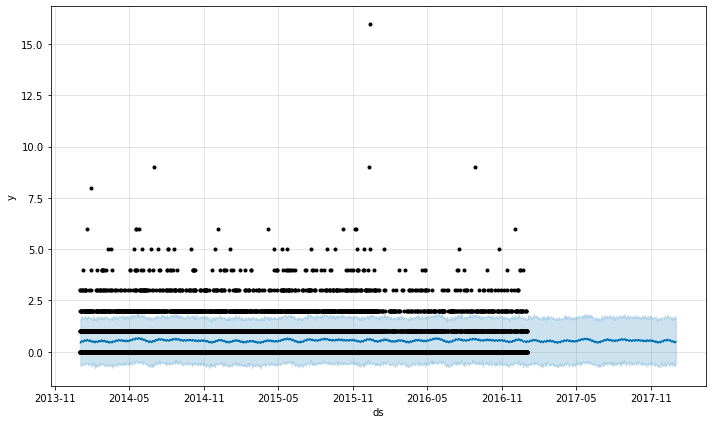

In [26]:
m.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


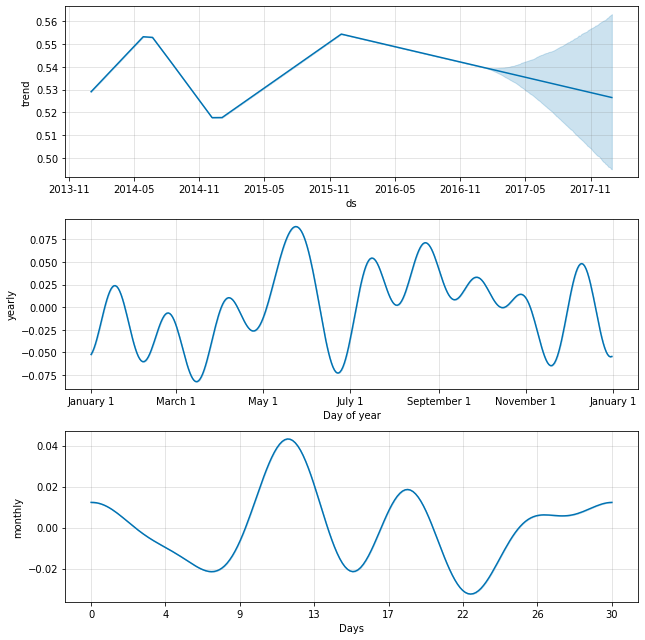

In [27]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df1_c).predict(future)
fig = m.plot_components(forecast)

In [28]:
df2 = data[data['PLAN_DISTRICT'] == 'Hampton Roads']
df2_c = df2[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df2_c['ds'] = df2_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m2 = Prophet()
m2.fit(df2_c)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

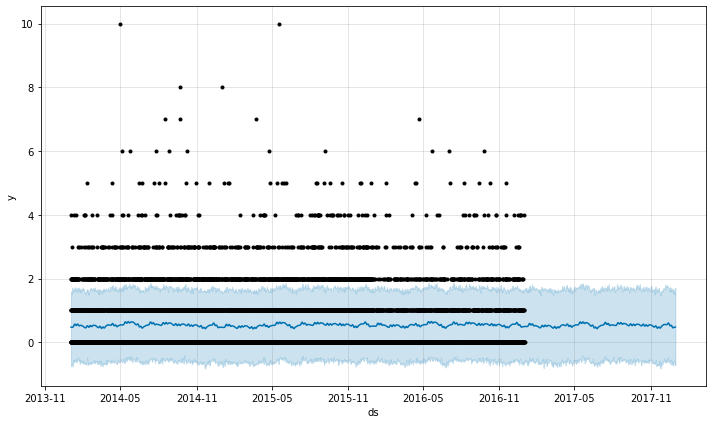

In [29]:
m2.plot(forecast)
pyplot.show()

In [32]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.789880,-0.449909,2.022979
1452,2017-12-27 17:00:00,0.777254,-0.439783,2.025640
1453,2017-12-28 17:00:00,0.767605,-0.480011,1.896124
1454,2017-12-29 17:00:00,0.761703,-0.428670,1.967009
1455,2017-12-30 17:00:00,0.761914,-0.431868,2.012135


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


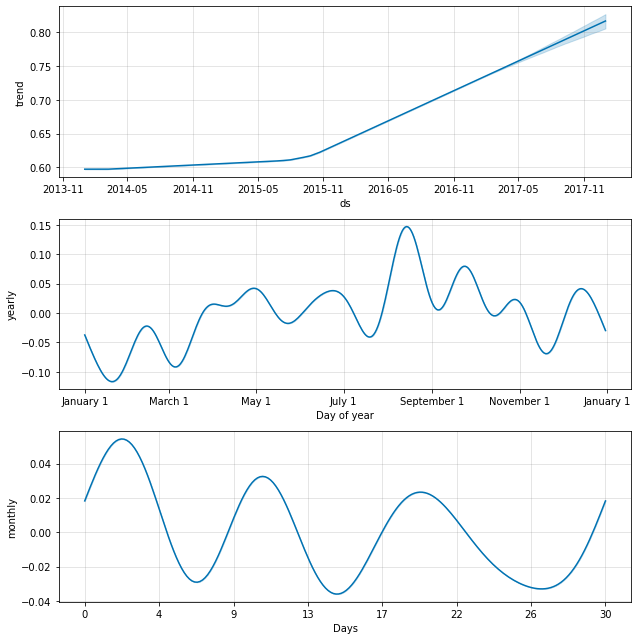

In [31]:
m2 = Prophet(weekly_seasonality=False)
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast2 = m2.fit(df2_c).predict(future)
fig = m2.plot_components(forecast2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

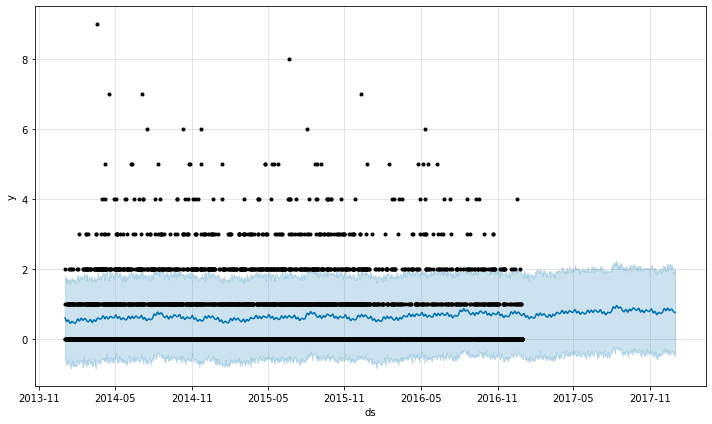

In [33]:
df3 = data[data['PLAN_DISTRICT'] == 'Richmond Regional']
df3_c = df3[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df3_c['ds'] = df3_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m3 = Prophet()
m3.fit(df3_c)
m3.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


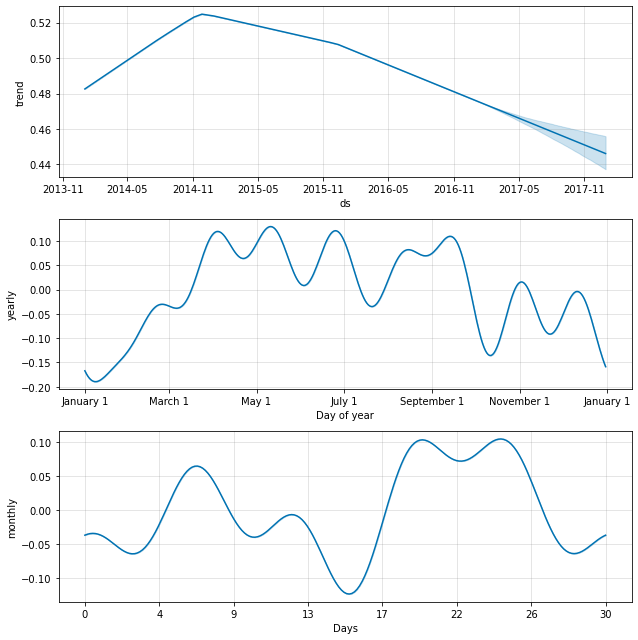

In [36]:
m3 = Prophet(weekly_seasonality=False)
m3.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast3 = m3.fit(df3_c).predict(future)
fig = m3.plot_components(forecast3)

In [37]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.430123,-0.749557,1.654785
1452,2017-12-27 17:00:00,0.405825,-0.748543,1.579987
1453,2017-12-28 17:00:00,0.344920,-0.800156,1.523105
1454,2017-12-29 17:00:00,0.274081,-0.940143,1.487360
1455,2017-12-30 17:00:00,0.229221,-0.909995,1.528126


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

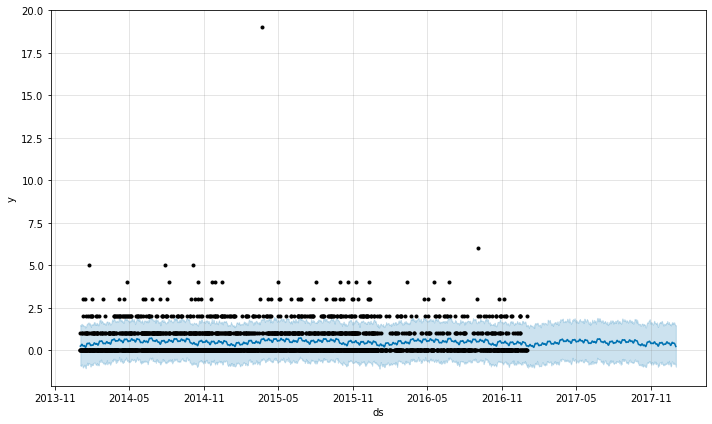

In [38]:
df4 = data[data['PLAN_DISTRICT'] == 'George Washington Regional']
df4_c = df4[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df4_c['ds'] = df4_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m4 = Prophet()
m4.fit(df4_c)
m4.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


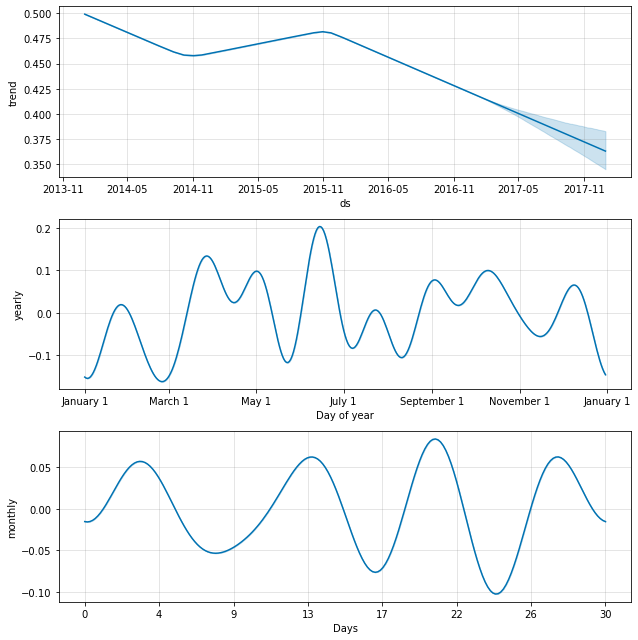

In [42]:
m4 = Prophet(weekly_seasonality=False)
m4.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast4 = m4.fit(df4_c).predict(future)
fig = m4.plot_components(forecast4)

In [43]:
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.152610,-1.041796,1.262537
1452,2017-12-27 17:00:00,0.179747,-0.919055,1.208695
1453,2017-12-28 17:00:00,0.240386,-0.830732,1.379575
1454,2017-12-29 17:00:00,0.281966,-0.771097,1.419698
1455,2017-12-30 17:00:00,0.274935,-0.813095,1.402328


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

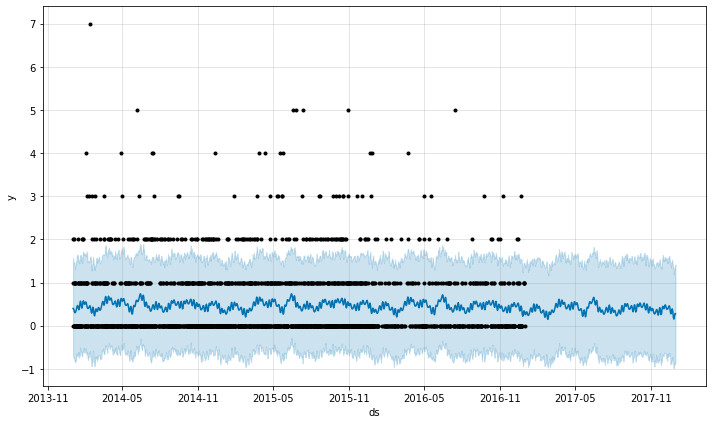

In [44]:
df5 = data[data['PLAN_DISTRICT'] == 'Central Shenandoah']
df5_c = df5[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df5_c['ds'] = df5_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m5 = Prophet()
m5.fit(df5_c)
m5.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


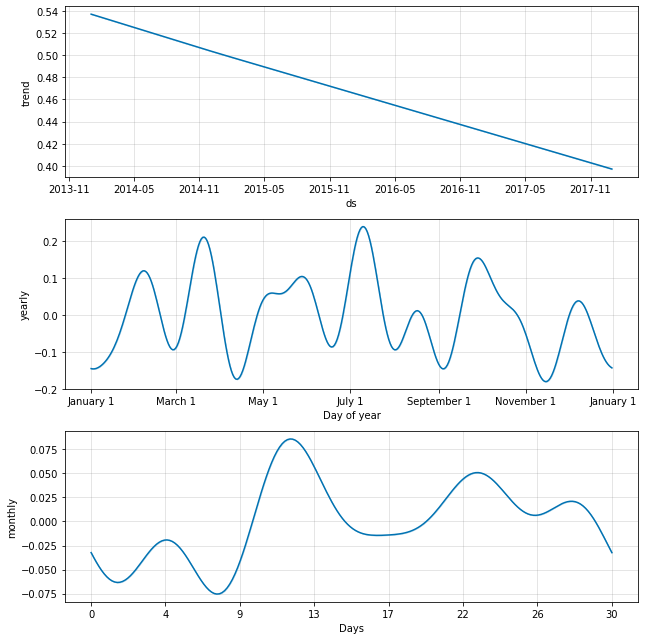

In [46]:
m5 = Prophet(weekly_seasonality=False)
m5.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast5 = m5.fit(df5_c).predict(future)
fig = m5.plot_components(forecast5)

In [47]:
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.303620,-0.716793,1.339334
1452,2017-12-27 17:00:00,0.279350,-0.781660,1.338553
1453,2017-12-28 17:00:00,0.269460,-0.808440,1.302770
1454,2017-12-29 17:00:00,0.273757,-0.783590,1.281717
1455,2017-12-30 17:00:00,0.276722,-0.805868,1.286432


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

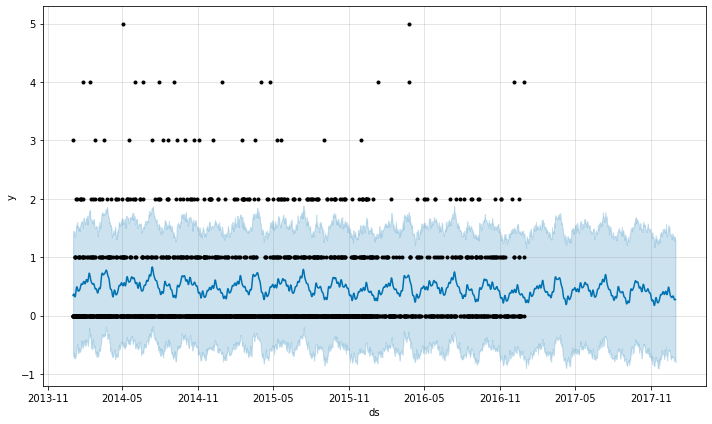

In [48]:
df6 = data[data['PLAN_DISTRICT'] == 'Roanoke Valley-Alleghany']
df6_c = df6[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df6_c['ds'] = df6_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m6 = Prophet()
m6.fit(df6_c)
m6.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


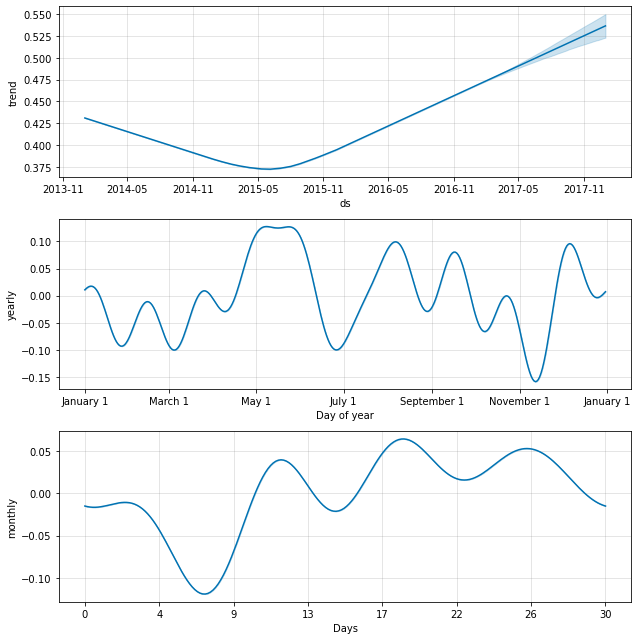

In [50]:
m6 = Prophet(weekly_seasonality=False)
m6.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast6 = m6.fit(df6_c).predict(future)
fig = m6.plot_components(forecast6)

In [51]:
forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.570672,-0.454851,1.483467
1452,2017-12-27 17:00:00,0.585219,-0.304528,1.510129
1453,2017-12-28 17:00:00,0.589935,-0.308638,1.545971
1454,2017-12-29 17:00:00,0.582286,-0.381794,1.566138
1455,2017-12-30 17:00:00,0.565735,-0.391484,1.444190


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

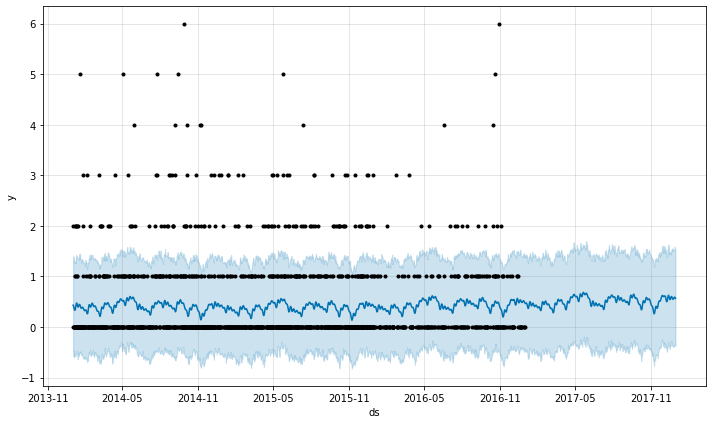

In [52]:
df7 = data[data['PLAN_DISTRICT'] == 'Thomas Jefferson']
df7_c = df7[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df7_c['ds'] = df7_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m7 = Prophet()
m7.fit(df7_c)
m7.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


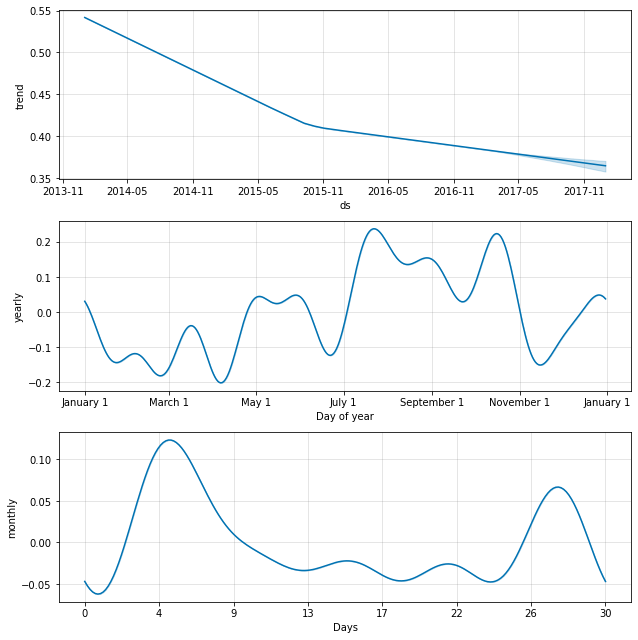

In [53]:
m7 = Prophet(weekly_seasonality=False)
m7.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast7 = m7.fit(df7_c).predict(future)
fig = m7.plot_components(forecast7)

In [54]:
forecast7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.368449,-0.701628,1.441752
1452,2017-12-27 17:00:00,0.393079,-0.724243,1.486322
1453,2017-12-28 17:00:00,0.435892,-0.589153,1.457339
1454,2017-12-29 17:00:00,0.469107,-0.536701,1.546688
1455,2017-12-30 17:00:00,0.464607,-0.645593,1.451858


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

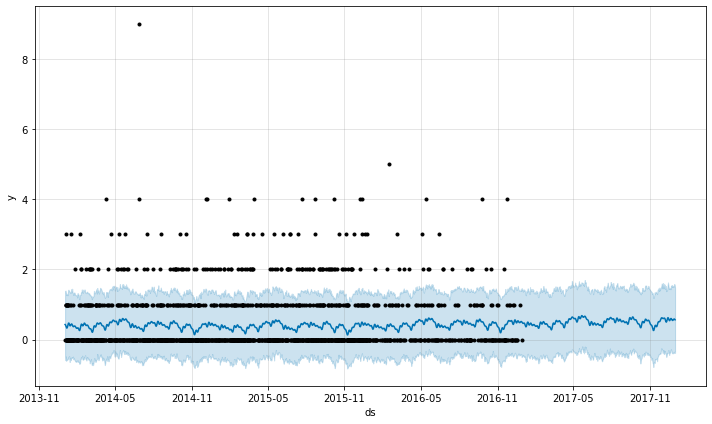

In [55]:
df8 = data[data['PLAN_DISTRICT'] == 'Region 2000']
df8_c = df8[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df8_c['ds'] = df8_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m8 = Prophet()
m8.fit(df8_c)
m8.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


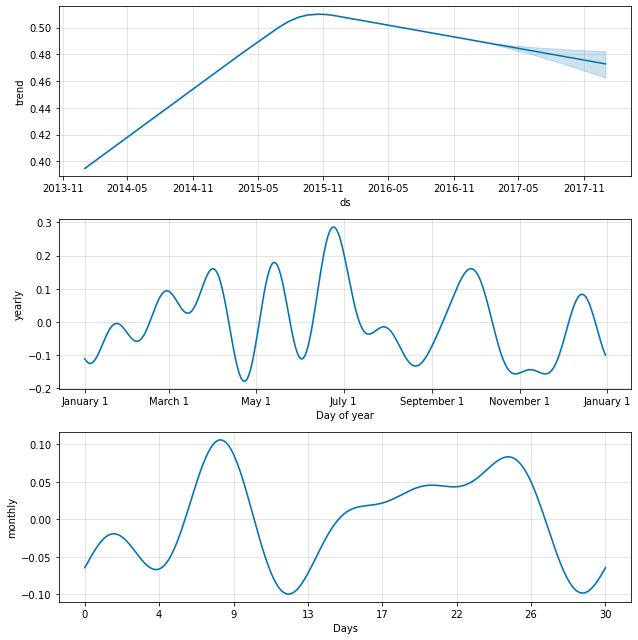

In [57]:
m8 = Prophet(weekly_seasonality=False)
m8.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast8 = m8.fit(df8_c).predict(future)
fig = m8.plot_components(forecast8)

In [58]:
forecast8[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.506936,-0.590387,1.542378
1452,2017-12-27 17:00:00,0.494228,-0.574938,1.582168
1453,2017-12-28 17:00:00,0.446349,-0.636167,1.532390
1454,2017-12-29 17:00:00,0.370392,-0.664402,1.431052
1455,2017-12-30 17:00:00,0.299474,-0.707598,1.384022


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

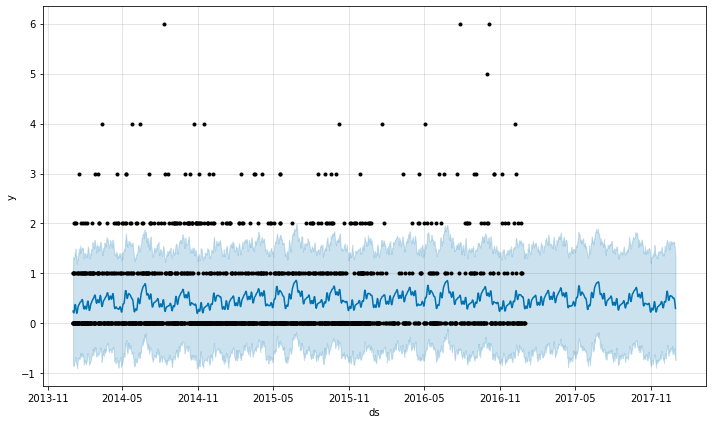

In [59]:
df9 = data[data['PLAN_DISTRICT'] == 'Northern Shenandoah Valley']
df9_c = df9[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df9_c['ds'] = df9_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m9 = Prophet()
m9.fit(df9_c)
m9.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


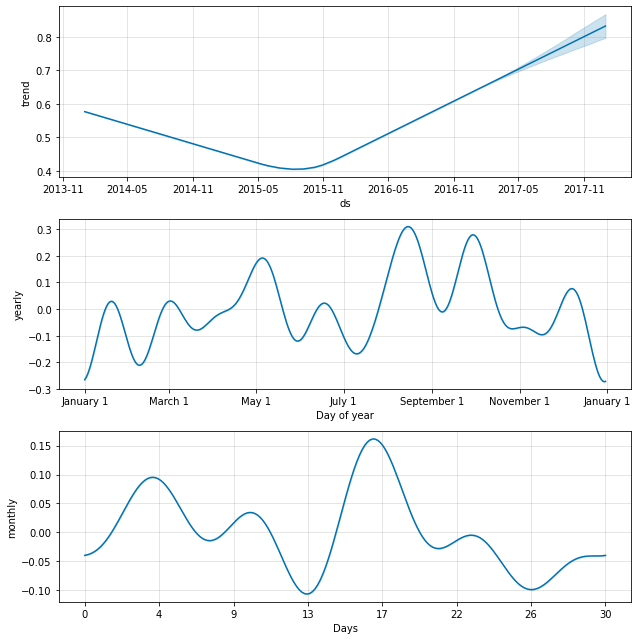

In [62]:
m9 = Prophet(weekly_seasonality=False)
m9.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast9 = m9.fit(df9_c).predict(future)
fig = m9.plot_components(forecast9)

In [63]:
forecast9[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.537024,-0.577784,1.603192
1452,2017-12-27 17:00:00,0.487301,-0.537120,1.600621
1453,2017-12-28 17:00:00,0.465009,-0.601908,1.492837
1454,2017-12-29 17:00:00,0.477667,-0.576013,1.577107
1455,2017-12-30 17:00:00,0.504944,-0.535878,1.547699


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

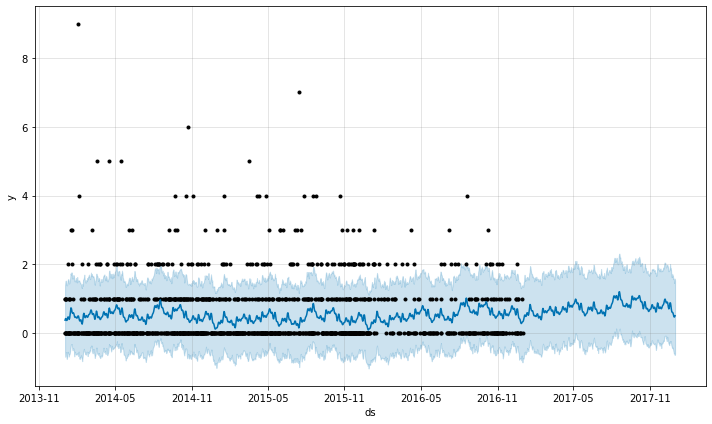

In [64]:
df10 = data[data['PLAN_DISTRICT'] == 'Rappahannock - Rapidan']
df10_c = df10[['CRASH_DT', 'ALL_INJURIES']].rename(columns={"CRASH_DT":"ds", "ALL_INJURIES":"y"})
df10_c['ds'] = df10_c["ds"].astype(np.datetime64).dt.tz_localize(None)
m10 = Prophet()
m10.fit(df10_c)
m10.plot(forecast)
pyplot.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


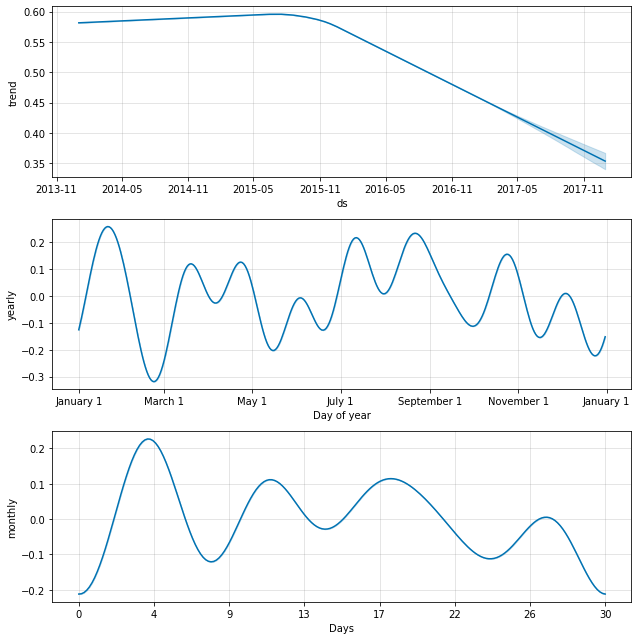

In [65]:
m10 = Prophet(weekly_seasonality=False)
m10.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast10 = m10.fit(df10_c).predict(future)
forecast10
fig = m10.plot_components(forecast10)

In [66]:
forecast10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1451,2017-12-26 17:00:00,0.033905,-1.041316,1.275220
1452,2017-12-27 17:00:00,0.080603,-1.102633,1.253841
1453,2017-12-28 17:00:00,0.147158,-1.075074,1.351600
1454,2017-12-29 17:00:00,0.184020,-0.991977,1.384329
1455,2017-12-30 17:00:00,0.156403,-0.958066,1.296649


In [ ]:
#Using a  for evaluation metric
#Using Northern Virginia dataset as a baseline to compare among models 

In [ ]:
from sklearn.metrics import mean_squared_error
  
# Given values
df1d = df1_c.sample(n=3061)
Y_true = df1d['y'] # Y_true = Y (original values)
  
# calculated values
Y_pred = forecast['yhat']  # Y_pred = Y'
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_true,Y_pred)

0.7216852363619299